# Regresión Lineal

In [1]:
import matplotlib.pyplot as plt
import numpy as np

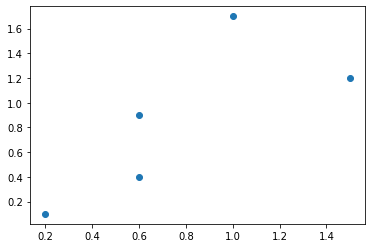

In [2]:
x = np.array([0.2, 0.6, 0.6, 1.5, 1.0])
y = np.array([0.1, 0.4, 0.9, 1.2, 1.7])
plt.scatter(x, y)
plt.show()

In [3]:
x_train, y_train = np.array([0.6, 1.0]), np.array([0.4, 1.7])
x_test, y_test = np.array([0.2, 0.6, 1.5]), np.array([0.1, 0.9, 1.2])
x_train.shape

(2,)

In [5]:
from sklearn.linear_model import LinearRegression

x_train.resize(len(x_train), 1)
y_train.resize(len(y_train), 1)
x_train.shape

modelo = LinearRegression()
modelo.fit(x_train, y_train)

coefs = modelo.coef_[0]
intercept = modelo.intercept_[0]
print('y = {:.4f} + {:.4f}x'.format(intercept, coefs[0]))

y = -1.5500 + 3.2500x


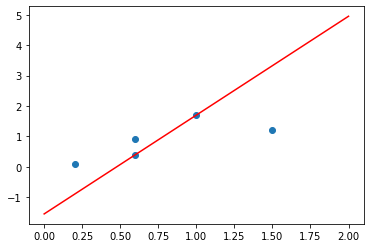

In [6]:
xx = np.linspace(0, 2, 2)
yy = modelo.predict(xx.reshape(len(xx), 1))

plt.scatter(x, y)
plt.plot(xx, yy, c='r')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error as mse
mse1 = mse(y_test, modelo.predict(x_test.reshape(len(x_test), 1)))
print('Error {}'.format(mse1))

Error 1.9218750000000007


In [8]:
from sklearn.linear_model import Ridge

modelo2 = Ridge(alpha=0.3)
modelo2.fit(x_train, y_train)
coefs = modelo.coef_[0]
intercept = modelo.intercept_[0]
print('y = {:.4f} + {:.4f}x'.format(intercept, coefs[0]))

y = -1.5500 + 3.2500x


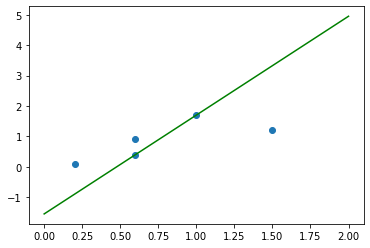

In [10]:
xx = np.linspace(0, 2, 2)
yy = modelo.predict(xx.reshape(len(xx), 1))

plt.scatter(x, y)
plt.plot(xx, yy, c='g')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error as mse
mse2 = mse(y_test, modelo.predict(x_test.reshape(len(x_test), 1)))
print('Error {}'.format(mse2))

Error 1.9218750000000007


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from matplotlib import cm

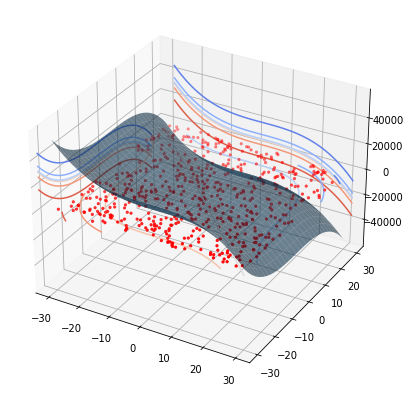

In [13]:
x = 30 - np.random.rand(1500).reshape(750, 2) * 60
y = -(x[:, 0]**3 + x[:, 1]**3)

x_train, x_test, y_train, y_test = train_test_split(x, y)

xs = np.tile(np.arange(-30, 31), (61, 1))
ys = np.tile(np.arange(-30, 31), (61, 1)).T
zs = -(xs**3 + ys**3)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:, 0], x_train[:, 1], marker='.', color='red')

ax.plot_surface(xs, ys, zs, alpha=0.6)
ax.contour(xs, ys, zs, zdir='z', offset=-5000, cmap=cm.coolwarm)
ax.contour(xs, ys, zs, zdir='x', offset=-35, cmap=cm.coolwarm)
ax.contour(xs, ys, zs, zdir='y', offset=35, cmap=cm.coolwarm)
plt.show()

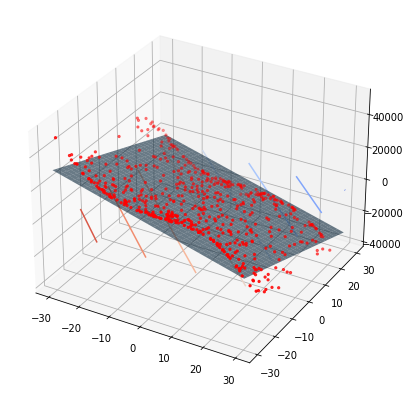

In [15]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, marker='.', color='red')

coefs = modelo.coef_
intercept = modelo.intercept_

xs = np.tile(np.arange(-30, 31), (61, 1))
ys = np.tile(np.arange(-30, 31), (61, 1)).T
zs = xs*coefs[0] + ys*coefs[1] + intercept

ax.plot_surface(xs, ys, zs, alpha=0.6)
ax.contour(xs, ys, zs, zdir='z', offset=-5000, cmap=cm.coolwarm)
ax.contour(xs, ys, zs, zdir='x', offset=-5000, cmap=cm.coolwarm)
ax.contour(xs, ys, zs, zdir='y', offset=-5000, cmap=cm.coolwarm)
plt.show()

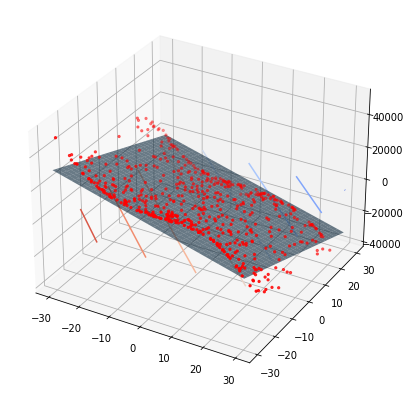

In [17]:
from sklearn.linear_model import Ridge
modelo2 = Ridge(0.5)
modelo2.fit(x_train, y_train)
y_pred = modelo2.predict(x_test)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, marker='.', color='red')

coefs = modelo2.coef_
intercept = modelo2.intercept_

xs = np.tile(np.arange(-30, 31), (61, 1))
ys = np.tile(np.arange(-30, 31), (61, 1)).T
zs = xs*coefs[0] + ys*coefs[1] + intercept

ax.plot_surface(xs, ys, zs, alpha=0.6)
ax.contour(xs, ys, zs, zdir='z', offset=-5000, cmap=cm.coolwarm)
ax.contour(xs, ys, zs, zdir='x', offset=-5000, cmap=cm.coolwarm)
ax.contour(xs, ys, zs, zdir='y', offset=-5000, cmap=cm.coolwarm)
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error as mse
mse1 = mse(y_test, modelo.predict(x_test.reshape(len(x_test), 2)))
mse2 = mse(y_test, modelo2.predict(x_test.reshape(len(x_test), 2)))
print('Modelo 1 : {}'.format(mse1))
print('Modelo 1 : {}'.format(mse2))

Modelo 1 : 34514055.202098295
Modelo 1 : 34514065.68642865


In [19]:
print(x)
print(ys)

[[-23.97664066  24.43755665]
 [  2.0042696   -2.67051155]
 [ -6.89736612 -22.08029455]
 ...
 [ -6.95495078  -4.22067968]
 [-11.99607416  12.47231829]
 [  8.74616955 -17.01135106]]
[[-30 -30 -30 ... -30 -30 -30]
 [-29 -29 -29 ... -29 -29 -29]
 [-28 -28 -28 ... -28 -28 -28]
 ...
 [ 28  28  28 ...  28  28  28]
 [ 29  29  29 ...  29  29  29]
 [ 30  30  30 ...  30  30  30]]


# Análisis de Agrupamiento
Estos modelos nos permiten saber si un conjunto de datos se puede agrupar de cierta manera

- No supervisados

## Agrupamiento jerárquico por aglomración